In [1]:
#### Load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#from collections import Counter

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE, family='sans-serif', serif='Arial')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text')

def figure_size_setting(WIDTH):
    #WIDTH = 700.0  # the number latex spits out
    FACTOR = 0.8  # the fraction of the width you'd like the figure to occupy
    fig_width_pt  = WIDTH * FACTOR
    inches_per_pt = 1.0 / 72.27
    golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  # because it looks good
    fig_width_in  = fig_width_pt * inches_per_pt  # figure width in inches
    fig_height_in = fig_width_in * golden_ratio   # figure height in inches
    fig_dims    = [fig_width_in, fig_height_in] # fig dims as a list
    return fig_dims

## Specify the path to the dataset to analyze

In [2]:
path_to_data = "./datasets/human_gut_microbiome/HM454/"
#path_to_data = "./datasets/human_gut_microbiome/HM455/"
#path_to_data = "./datasets/human_gut_microbiome/HM466/"
#path_to_data = "./datasets/human_gut_microbiome/HM503/"
#path_to_data = "./datasets/mouse_gut_microbiome/"
#path_to_data = "./datasets/in_vitro_culture/"

## Load the metagenome-annotated COGs (GCN)

In [3]:
df1 = pd.read_csv(path_to_data+"GCN.csv", index_col=0)
df1 = df1.loc[:,df1.sum(0)!=0]
print(df1.shape)
df1.head()

(169, 3349)


,COG0674,COG1056,COG0743,COG1953,COG4209,COG0052,COG1968,COG0001,COG1640,COG0019,...,COG0847,COG1234,COG1070,COG0242,COG0629,COG3259,COG1151,COG1649,COG3379,num_detected
Clostridium,0,0,34,0,78,0,32,5,80,68,...,0,100,218,8,71,0,83,0,0,1943
Bacteroides,1738,4,2377,0,0,1506,1427,0,6126,4211,...,2063,1777,9948,811,797,0,2257,13692,0,1896
Eubacterium,0,0,25,2,4,14,23,24,73,30,...,7,46,141,18,19,0,1288,41,0,1731
Faecalibacterium,1,0,337,0,349,45,246,0,1069,730,...,306,327,218,110,109,0,452,461,0,1684
Blautia,2,0,172,0,592,13,122,1,70,1507,...,2,832,3592,86,18,0,286,0,3,1668


## Load the metaproteome-annotated COGs (PCN)

In [4]:
df2 = pd.read_csv(path_to_data+"PCN.csv", index_col=0).fillna(0).astype(int)
df2 = df2.loc[:,df2.sum(0)!=0]
print(df2.shape)
df2.head()


(253, 1553)


,COG0001,COG0002,COG0005,COG0006,COG0008,COG0009,COG0010,COG0011,COG0012,COG0013,...,COG5495,COG5496,COG5514,COG5520,COG5523,COG5527,COG5549,COG5564,COG5567,COG5587
Acetivibrio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acetoanaerobium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acidaminococcus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acidimicrobium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acidobacterium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Load the COGs metadata with names and functions
The functions of all COGs are given by the paper from Eugene Koonin [The COG database: a tool for genome-scale analysis of protein functions and evolution](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC102395/). One-letter abbreviations for the classfication of COGs by functional categories: 
* J, translation, including ribosome structure and biogenesis; 
* L, replication, recombination and repair; 
* K, transcription; 
* O, molecular chaperones and related functions; 
* M, cell wall structure and biogenesis and outer membrane; 
* N, secretion, motility and chemotaxis; 
* T, signal transduction; 
* P, inorganic ion transport and metabolism; 
* C, energy production and conversion; 
* G, carbohydrate metabolism and transport; 
* E, amino acid metabolism and transport; 
* F, nucleotide metabolism and transport; 
* H, coenzyme metabolism; 
* I, lipid metabolism; 
* D, cell division and chromosome partitioning; 
* R, general functional prediction only; 
* S, no functional prediction.

In [5]:
df3 = pd.read_csv("./datasets/cognames2003-2014.csv", delimiter='\t', index_col=0, encoding= 'unicode_escape')
print(df3.shape)
df3.head()

(4631, 2)


,func,name
# COG,,
COG0001,H,Glutamate-1-semialdehyde aminotransferase
COG0002,E,N-acetyl-gamma-glutamylphosphate reductase
COG0003,P,"Anion-transporting ATPase, ArsA/GET3 family"
COG0004,P,Ammonia channel protein AmtB
COG0005,F,Purine nucleoside phosphorylase


## Load the relative abundance of different genera

In [6]:
df4 = pd.read_csv(path_to_data+"abundances.csv", index_col=0)
print(df4.shape)
df4.head()


(85, 1)


,HM0454
Name,
Actinomyces,0.01142
Adlercreutzia,0.00166
Agathobaculum,0.14843
Akkermansia,0.00000
Alistipes,9.50242


## Find the intersected genera and COGs between two types of data

In [7]:
i_joint_genera = df4.index
i_joint_COG = np.intersect1d(df1.columns, df2.columns)
df1_intersection = df1.reindex(i_joint_genera).fillna(0)
df1_intersection = df1_intersection[i_joint_COG]
df2_intersection = df2.reindex(i_joint_genera).fillna(0)
df2_intersection = df2_intersection[i_joint_COG]


print(df1_intersection.shape)
print(np.sum(df1_intersection!=0).sum() / df1_intersection.shape[0] / df1_intersection.shape[1])
print(np.sum(df2_intersection!=0).sum() / df2_intersection.shape[0] / df2_intersection.shape[1])
print(np.sum(df2_intersection!=0).sum() / np.sum(df1_intersection!=0).sum())

(85, 1542)
0.22047760738536662
0.049423971923399715
0.22416776247491177


In [8]:
df3_redundancy = df3.reindex(df1_intersection.columns)
df3_redundancy['number of non-zero genomic capability'] = (df1_intersection!=0).apply(np.sum)
df3_redundancy['number of non-zero protein function'] = (df2_intersection!=0).apply(np.sum)
df3_redundancy

,func,name,number of non-zero genomic capability,number of non-zero protein function
COG0001,H,Glutamate-1-semialdehyde aminotransferase,11,1
COG0002,E,N-acetyl-gamma-glutamylphosphate reductase,30,8
COG0005,F,Purine nucleoside phosphorylase,27,4
COG0006,E,Xaa-Pro aminopeptidase,34,12
COG0008,J,Glutamyl- or glutaminyl-tRNA synthetase,34,14
...,...,...,...,...
COG5527,X,Protein involved in initiation of plasmid repl...,8,1
COG5549,O,Predicted Zn-dependent protease,5,1
COG5564,S,Predicted TIM-barrel enzyme,3,1
COG5567,S,Predicted small periplasmic lipoprotein YifL (...,7,1


## Compute $FR_g$ and $FR_p$ for all COGs

In [9]:
def redundancy_metrics(x):
    abundance_dist = df4.values.flatten()
    abundance_dist = abundance_dist / np.sum(abundance_dist)
    p = (x!=0).astype(int) * abundance_dist
    redundancy = np.sum(np.outer(p, p)) - np.sum(p*p)
    return [redundancy]

In [10]:
df3_redundancy = df3.reindex(df1_intersection.columns)
df3_redundancy['number of non-zero genomic capability'] = (df1_intersection!=0).apply(np.sum)
df3_redundancy['number of non-zero protein function'] = (df2_intersection!=0).apply(np.sum)

x = df1_intersection.apply(redundancy_metrics).values.flatten()
y = df2_intersection.apply(redundancy_metrics).values.flatten()

df3_redundancy['FRg'] = x
df3_redundancy['FRp'] = y


In [11]:
#### Load FR_g and FR_p from model simulations for classification
from sklearn.mixture import GaussianMixture
from pandas import DataFrame
from sklearn.neighbors import NearestCentroid
x = [0.44091482138157106, 0.5194219821997395, 0.40405962858364264, 0.3420499824433598, 0.5915941646198182, 0.441336165186289, 0.38420352990267204, 0.33540289003975005, 0.3484009915867216, 0.43538246842323414, 0.2933309774034314, 0.49937785773629023, 0.358960890991606, 0.2281667876831664, 0.31096375905070084, 0.5691997283007124, 0.31689299472784016, 0.7710856028167324, 0.2933530272604885, 0.2985843609221639, 0.06877340243284809, 0.03650996013817893, 0.03905253796616261, 0.008171178748386626, 0.04410939153618958, 0.026617681415634756, 0.02293536951184292, 0.021413422635938224, 0.0445658635190809, 0.01605104399753017, 0.0320404435173819, 0.039679535332213633, 0.0656919802067171, 0.029115338148909715, 0.037918632285728116, 0.014250804674976893, 0.09907879991151866, 0.015882464407262542, 0.07071794149457987, 0.004637748148037015, 0.6937662625001796, 0.34438041559548455, 0.7013172771371557, 0.3785719895669836, 0.6740067242426284, 0.7935549574178399, 0.40976955837034945, 0.6157526788182829, 0.6972003273229549, 0.41777082451155023, 0.5982248849818911, 0.7443861209830908, 0.41631304906376043, 0.5017092240530739, 0.5355551918179791, 0.6461576878593456, 0.50660362849539, 0.6243189497236411, 0.5396583150856663, 0.7013346612687903]
y = [0.005951899679487141, 0.0042523481996700205, 0.016565850228022462, 0.03034168861992096, 0.06441285449106843, 0.07727232092199751, 0.012317210421323818, 0.028126105673244937, 0.0357826618293216, 0.010156303665954318, 0.00619962287976838, 0.021364060819666693, 0.012547204858472365, 0.0, 0.008673945747287994, 0.02645848642068906, 0.01444295170879685, 0.04483741685085553, 0.01985244481701419, 0.0, 0.00447862878282577, 0.007768460924454804, 0.011040287352558657, 0.0, 0.000665797964954841, 0.001944134994761054, 0.002067545293243221, 0.008050231031542197, 0.0023506558297183167, 0.000652748892935323, 0.0, 0.000636279755668505, 0.0062659387986643104, 0.0020317528972003764, 0.006380472922723805, 0.0009879828724099775, 0.015622455814761457, 0.0, 0.006479780920484809, 0.0, 0.6316885365535028, 0.30185536474741603, 0.6448045989010438, 0.30396871906486683, 0.5800904469199254, 0.6161688718091718, 0.3954448330382181, 0.39520521878553316, 0.5722792445087949, 0.3244016356789427, 0.5411626839687609, 0.7027632130348133, 0.4056908217549412, 0.4189499942737571, 0.48926447497584413, 0.550163127516598, 0.4039428800983677, 0.4954269302357555, 0.356005660126897, 0.5969983283440773]
x = [0.6656944962819956, 0.6475339431531657, 0.5955855594281267, 0.45636494373652103, 0.4428407862479843, 0.3989265864817652, 0.419805975486156, 0.40495623492064187, 0.5139994356020577, 0.46882588584497215, 0.5176032358147544, 0.41562486179014746, 0.3859450660894762, 0.5383278416047659, 0.3878259930431616, 0.27111162067852285, 0.7487525439774433, 0.5572808465333579, 0.3028221191842361, 0.41561038458458427, 0.0032473009364543674, 0.030922232876440622, 0.035476949455513045, 0.0363513671339007, 0.02867524385675189, 0.021458544404924375, 0.04819591103098346, 0.10100072783988072, 0.015152803454777524, 0.09046249907525106, 0.012303365659776551, 0.006198542776890545, 0.05459863907108794, 0.02181362278348311, 0.007587041722513803, 0.05432750623315163, 0.026323117676396748, 0.04761226119935232, 0.034092673592562316, 0.05882972077371699, 0.5944670126259743, 0.4984273665943071, 0.7371708337260298, 0.38803947290604746, 0.34979016611053965, 0.6692582563139708, 0.5228315976212512, 0.5226502106096081, 0.6219700908466935, 0.7717949633258694, 0.6270011149301395, 0.1939444633089296, 0.8350324565213488, 0.5018321275543474, 0.4294311289320497, 0.6240262667814183, 0.7893064569373773, 0.5538084332612433, 0.5191265009681039, 0.6579298276533517]
y = [0.004409216995079535, 0.01143134761753515, 0.03471905213851771, 0.0, 0.0, 0.004454521726108742, 0.0016130370160982294, 0.0052078781356363485, 0.0, 0.0, 0.011302080876568005, 0.010969865071984667, 0.0, 0.002833020422408061, 0.005854559702057303, 0.00014184561330814844, 0.0006373181520609949, 0.002783193523298217, 0.0, 0.013174784530874794, 0.00045014379251139035, 0.0, 0.0026958532569412736, 0.0, 0.0, 0.0, 0.0, 0.0208438166450811, 0.0006608667576802441, 0.0, 0.0, 0.0, 0.0004236547170174739, 0.0, 0.0, 0.0076869229850323045, 0.004507234363696905, 0.003050655063588136, 0.0, 0.0002803044823216959, 0.48299141834063164, 0.36472389289980633, 0.609852216593177, 0.36044561389548524, 0.2790560949136387, 0.47772855042040185, 0.24227773145342743, 0.4521560309280467, 0.5477713534301167, 0.7531465064603847, 0.5871884436661233, 0.17220951076205854, 0.7457298376514723, 0.31986532426906544, 0.3963933423877179, 0.42383101766199116, 0.6699392893117748, 0.47258596046771323, 0.45318222921327306, 0.5440247415579527]
Data = {'x': x,
        'y': y}
df = DataFrame(Data,columns=['x','y'])
gmm = GaussianMixture(n_components=3).fit(df.values)
y_hc = gmm.predict(df.values)
clf = NearestCentroid()
clf.fit(df.values, y_hc)
centroids = clf.centroids_
print(centroids)


x = [26, 29, 22, 23, 25, 22, 22, 23, 22, 22, 21, 27, 23, 19, 22, 21, 24, 29, 22, 24, 8, 8, 7, 5, 8, 7, 7, 7, 8, 6, 8, 9, 8, 8, 5, 7, 9, 7, 9, 4, 33, 21, 29, 22, 29, 31, 23, 26, 25, 23, 27, 28, 24, 24, 28, 25, 25, 25, 26, 30]
y = [4, 3, 4, 4, 4, 5, 2, 5, 4, 2, 2, 3, 4, 1, 3, 5, 3, 4, 3, 1, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 30, 18, 27, 18, 25, 27, 22, 21, 22, 18, 24, 27, 23, 20, 26, 22, 21, 18, 18, 26]
x = [27, 29, 28, 24, 23, 22, 25, 24, 25, 25, 26, 23, 22, 24, 21, 22, 30, 24, 21, 24, 4, 5, 7, 11, 7, 5, 8, 11, 8, 10, 4, 4, 8, 6, 4, 8, 6, 7, 7, 10, 29, 24, 31, 22, 21, 28, 31, 26, 27, 30, 26, 19, 32, 27, 23, 26, 31, 26, 26, 29]
y = [3, 2, 3, 1, 1, 3, 2, 3, 1, 1, 2, 2, 1, 3, 2, 2, 2, 3, 1, 4, 2, 1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 2, 3, 2, 1, 2, 25, 20, 27, 21, 18, 23, 24, 24, 25, 29, 25, 18, 30, 22, 22, 22, 28, 23, 24, 24]

denominator_deg = np.max([np.max(x), np.max(y)])
x = np.array(x) / denominator_deg; y = np.array(y) / denominator_deg;
Data = {'x': x,
        'y': y}
df_deg = DataFrame(Data,columns=['x','y'])
gmm_deg = GaussianMixture(n_components=3).fit(df_deg.values)
y_hc_deg = gmm_deg.predict(df_deg.values)
clf = NearestCentroid()
clf.fit(df_deg.values, y_hc_deg)
centroids_deg = clf.centroids_
print(centroids_deg)


[[0.03334891 0.00103977]
 [0.54803998 0.44647347]
 [0.47777192 0.00547659]]
[[0.834375  0.740625 ]
 [0.7640625 0.065625 ]
 [0.21875   0.05     ]]


SignificanceResult(statistic=0.910958689440669, pvalue=0.0)


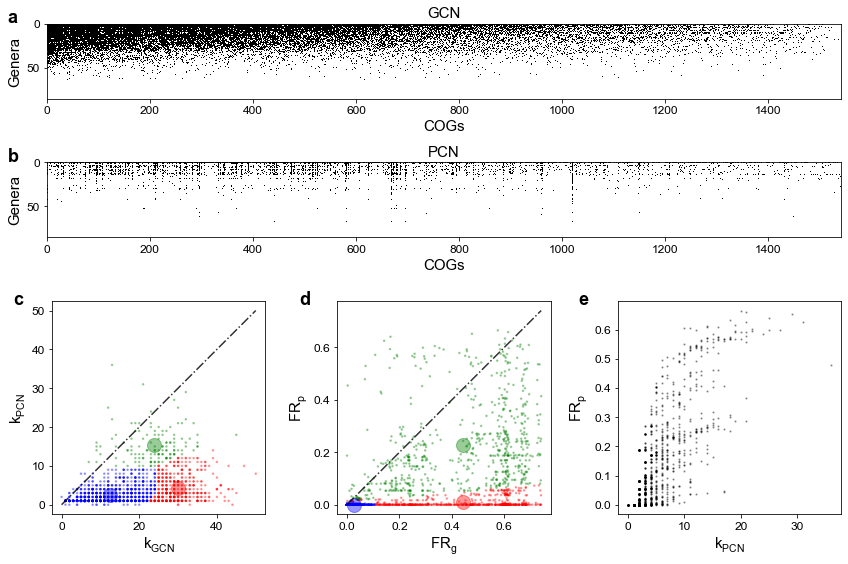

In [12]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Arial'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.default'] = 'regular'

from pandas import DataFrame
from sklearn.cluster import KMeans

color_map = plt.cm.get_cmap('Greys')
reversed_color_map = color_map.reversed()
i_COG_decreasing_order = np.argsort((df1_intersection>0).sum(0).values)[::-1]
i_species_decreasing_order = np.argsort((df1_intersection>0).sum(1).values)[::-1]

plt.close('all')
fig = plt.figure(figsize=(12,8))
axes = plt.subplot2grid((4, 3), (0, 0), colspan=3, rowspan=1)
axes.pcolor(df1_intersection.iloc[i_species_decreasing_order, i_COG_decreasing_order]>0, cmap=color_map)
axes.invert_yaxis()
axes.set_xlabel('COGs')
axes.set_ylabel("Genera")
axes.set_title('GCN')
axes.text(-0.05, 1.2, '$a$', transform=axes.transAxes, fontsize=18, fontweight='bold', va='top')

axes = plt.subplot2grid((4, 3), (1, 0), colspan=3, rowspan=1)
axes.pcolor(df2_intersection.iloc[i_species_decreasing_order, i_COG_decreasing_order]>0, cmap=color_map)
axes.invert_yaxis()
axes.set_xlabel('COGs')
axes.set_ylabel("Genera")
axes.set_title('PCN')
axes.text(-0.05, 1.2, '$b$', transform=axes.transAxes, fontsize=18, fontweight='bold', va='top')

from sklearn.mixture import GaussianMixture
from pandas import DataFrame
from sklearn.neighbors import NearestCentroid
axes = plt.subplot2grid((4, 3), (2, 0), colspan=1, rowspan=2)
x = (df1_intersection!=0).apply(np.sum)
y = (df2_intersection!=0).apply(np.sum)
denominator_deg = np.max([np.max(x), np.max(y)])
x = np.array(x) / denominator_deg; y = np.array(y) / denominator_deg;
Data = {'x': x,
        'y': y}
df = DataFrame(Data,columns=['x','y'])
y_hc_deg = gmm_deg.predict(df.values)
clf_deg = NearestCentroid()
clf_deg.fit(df.values, y_hc_deg)
centroids_deg = clf_deg.centroids_
rank_deg = np.argsort(np.argsort(np.prod(centroids_deg, 1))) #[specialist, niche, essential]
color_list = ['blue', 'red', 'green']
cmap = list(map(lambda x: color_list[rank_deg[x]], y_hc_deg))
axes.scatter(df['x']*denominator_deg, df['y']*denominator_deg, c=cmap, s=2.5, alpha=0.3)
for i in range(3):
    axes.plot(centroids_deg[i, 0]*denominator_deg, centroids_deg[i, 1]*denominator_deg, 'o' , color=color_list[rank_deg[i]], markersize=14, lw=4, alpha=0.4)
axes.plot([0, np.max(x)*denominator_deg], [0, np.max(x)*denominator_deg], 'k-.', alpha=0.8, lw=1.5)
axes.set_xlabel("$k_{GCN}$")
axes.set_ylabel("$k_{PCN}$")
axes.set_aspect('equal')
axes.text(-0.18, 1.05, '$c$', transform=axes.transAxes, fontsize=18, fontweight='bold', va='top')

from sklearn.mixture import GaussianMixture
from pandas import DataFrame
from sklearn.neighbors import NearestCentroid
axes = plt.subplot2grid((4, 3), (2, 1), colspan=1, rowspan=2)
x = df1_intersection.apply(redundancy_metrics).values.flatten()
y = df2_intersection.apply(redundancy_metrics).values.flatten()
Data = {'x': x,
        'y': y}
df = DataFrame(Data,columns=['x','y'])
y_hc = gmm.predict(df.values)
clf = NearestCentroid()
clf.fit(df.values, y_hc)
centroids = clf.centroids_
rank = np.argsort(np.argsort(np.prod(centroids, 1))) #[specialist, niche, essential]
color_list = ['blue', 'red', 'green']
cmap = list(map(lambda x: color_list[rank[x]], y_hc))
axes.scatter(df['x'], df['y'], c=cmap, s=2.5, alpha=0.3)
for i in range(3):
    axes.plot(centroids[i, 0], centroids[i, 1], 'o' , color=color_list[rank[i]], markersize=14, lw=4, alpha=0.4)
axes.plot([0, np.max(x)], [0, np.max(x)], 'k-.', alpha=0.8, lw=1.5)
axes.set_xlabel("$FR_g$")
axes.set_ylabel("$FR_p$")
axes.set_aspect('equal')
axes.text(-0.18, 1.05, '$d$', transform=axes.transAxes, fontsize=18, fontweight='bold', va='top')

axes = plt.subplot2grid((4, 3), (2, 2), colspan=1, rowspan=2)
x = (df2_intersection!=0).apply(np.sum).values
y = df2_intersection.apply(redundancy_metrics).values.flatten()
from scipy.stats import spearmanr
print(spearmanr(x, y))
axes.plot(x, y,'k.', alpha=0.3, markersize=2.5)
axes.set_xlabel('$k_{PCN}$')
axes.set_ylabel('$FR_p$')
axes.text(-0.18, 1.05, '$e$', transform=axes.transAxes, fontsize=18, fontweight='bold', va='top')
plt.tight_layout(h_pad=0.8)
#fig.savefig('./figures/GCN_PCN.pdf')


In [13]:
#### Prepare all dataframes required for the comparison between FRg and FRp for various protein families
from statannot import add_stat_annotation
fs2=16
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Arial'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.default'] = 'regular'

df3_redundancy_clusters = df3_redundancy.copy()
df3_redundancy_clusters['clusters'] = rank[y_hc]
df3_redundancy_clusters['clusters_deg'] = rank_deg[y_hc_deg]

pathway2COG = pd.read_csv("./datasets/pathway2COG.csv", index_col=0).set_index('COG')
num_protein_groups = 10

i_protein_group = 0
ABC_transporters = df3_redundancy[df3_redundancy['name'].str.contains('ABC-type').fillna(False)]
one_protein_group = ABC_transporters.copy()
protein_group_name = "ABC-type transporters"
one_protein_group['clusters'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters']
one_protein_group['clusters_deg'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters_deg']
one_protein_group['protein_group_name'] = protein_group_name
df_protein_groups_all = one_protein_group.copy()

i_protein_group += 1
Ribosomal_protein = df3_redundancy[df3_redundancy['name'].str.contains('Ribosomal protein').fillna(False)]
Ribosomal_protein = Ribosomal_protein[~Ribosomal_protein['name'].str.contains('ase').fillna(False)]
one_protein_group = Ribosomal_protein.copy()
protein_group_name = "Ribosomal proteins"
one_protein_group['clusters'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters']
one_protein_group['clusters_deg'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters_deg']
one_protein_group['protein_group_name'] = protein_group_name
df_protein_groups_all = df_protein_groups_all.merge(one_protein_group, how='outer')

i_protein_group += 1
i_sugar = df3_redundancy_clusters[['name']].apply(lambda x: "ose" in str(x.values[0]), axis=1)
one_protein_group = df3_redundancy_clusters[i_sugar]
protein_group_name = "Sugar utilization"
one_protein_group['clusters'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters']
one_protein_group['clusters_deg'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters_deg']
one_protein_group['protein_group_name'] = protein_group_name
df_protein_groups_all = df_protein_groups_all.merge(one_protein_group, how='outer')

i_protein_group += 1
i_phosphotransferase_COGs = df3['name'][df3['name'].apply(lambda x: ("phosphotransferase" in x) or (("Phosphotransferase system" in x)))].index
i_phosphotransferase_COGs = np.intersect1d(df3_redundancy_clusters.index, i_phosphotransferase_COGs)
#i_sugar = df3_redundancy_clusters[['name']].apply(lambda x: "ose" in str(x.values[0]), axis=1)
one_protein_group = df3_redundancy_clusters.loc[i_phosphotransferase_COGs]
protein_group_name = "PTS system"
one_protein_group['clusters'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters']
one_protein_group['clusters_deg'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters_deg']
one_protein_group['protein_group_name'] = protein_group_name
df_protein_groups_all = df_protein_groups_all.merge(one_protein_group, how='outer')

i_protein_group += 1
df_EC2COG = pd.read_csv("./datasets/functions.csv", encoding = "ISO-8859-1")[['EC_id', 'EC_de', 'COG accession']]
df_EC2COG = df_EC2COG[df_EC2COG[['EC_id']].apply(lambda x: "3.2.1." in str(x.values[0]), axis=1)]
df_EC2COG = df_EC2COG.drop_duplicates("COG accession")
hydrolase_COGs = df_EC2COG['COG accession'].values
hydrolase_COGs = hydrolase_COGs[hydrolase_COGs==hydrolase_COGs]
intersected_hydrolase_COGs = np.intersect1d(df3_redundancy_clusters.index, hydrolase_COGs)
one_protein_group = df3_redundancy_clusters.loc[intersected_hydrolase_COGs]
protein_group_name = "Glycosyl hydrolase"
one_protein_group['clusters'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters']
one_protein_group['clusters_deg'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters_deg']
one_protein_group['protein_group_name'] = protein_group_name
df_protein_groups_all = df_protein_groups_all.merge(one_protein_group, how='outer')

interesting_pathways = ['Aminoacyl-tRNA synthetases', 'Arginine biosynthesis','Aromatic amino acid biosynthesis', 
                        'Asparagine biosynthesis','Cysteine biosynthesis','Glutamine biosynthesis', 
                        'Glycine cleavage', 'Glycolysis','Histidine biosynthesis', 
                        'Isoleucine, leucine, valine biosynthesis', 'Lysine biosynthesis',
                        'Methionine biosynthesis','Proline biosynthesis','Proline degradation', 
                        'Purine biosynthesis', 'Purine salvage','Pyrimidine biosynthesis',
                        'Pyrimidine degradation','RNA polymerase','Serine biosynthesis', 'TCA cycle',
                        'Threonine biosynthesis']
for pathway in interesting_pathways:
    i_protein_group += 1
    i_intersected_path2cog = np.intersect1d(df3_redundancy_clusters.index, pathway2COG[pathway2COG['pathway']==pathway].index)
    one_protein_group = df3_redundancy_clusters.loc[i_intersected_path2cog]
    protein_group_name = pathway
    one_protein_group['clusters'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters']
    one_protein_group['clusters_deg'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters_deg']
    one_protein_group['protein_group_name'] = protein_group_name
    df_protein_groups_all = df_protein_groups_all.merge(one_protein_group, how='outer')
    
df_boxplot = df_protein_groups_all.reset_index()[['index', 'name']]
df_boxplot['network degree'] = df_protein_groups_all['number of non-zero genomic capability'].values
df_boxplot['network type'] = 'genomic capability/GCN'
df_boxplot['Redundancy'] = df_protein_groups_all['FRg'].values
df_boxplot['Redundancy type'] = '$FR_g$'
df_boxplot['COG type'] = df_protein_groups_all['protein_group_name']
df_boxplot_allData = df_boxplot.copy()
df_boxplot = df_protein_groups_all.reset_index()[['index', 'name']]
df_boxplot['network degree'] = df_protein_groups_all['number of non-zero protein function'].values
df_boxplot['network type'] = 'protein function/PCN'
df_boxplot['Redundancy'] = df_protein_groups_all['FRp'].values
df_boxplot['Redundancy type'] = '$FR_p$'
df_boxplot['COG type'] = df_protein_groups_all['protein_group_name']
df_boxplot_allData = df_boxplot_allData.merge(df_boxplot, how='outer')
df_boxplot_allData1 = df_boxplot_allData.copy()


<ipython-input-13-e09105422d53>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_protein_group['clusters'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters']
<ipython-input-13-e09105422d53>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_protein_group['clusters_deg'] = df3_redundancy_clusters.loc[one_protein_group.index]['clusters_deg']
<ipython-input-13-e09105422d53>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

All proteins_genomic capability/GCN v.s. All proteins_protein function/PCN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=2.184e+06
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

All proteins_genomic capability v.s. All proteins_protein function: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.821e-205 U_stat=1.943e+06
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ABC-type transporters_genomic capability/GCN v.s. ABC-type transporters_protein function/PCN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.

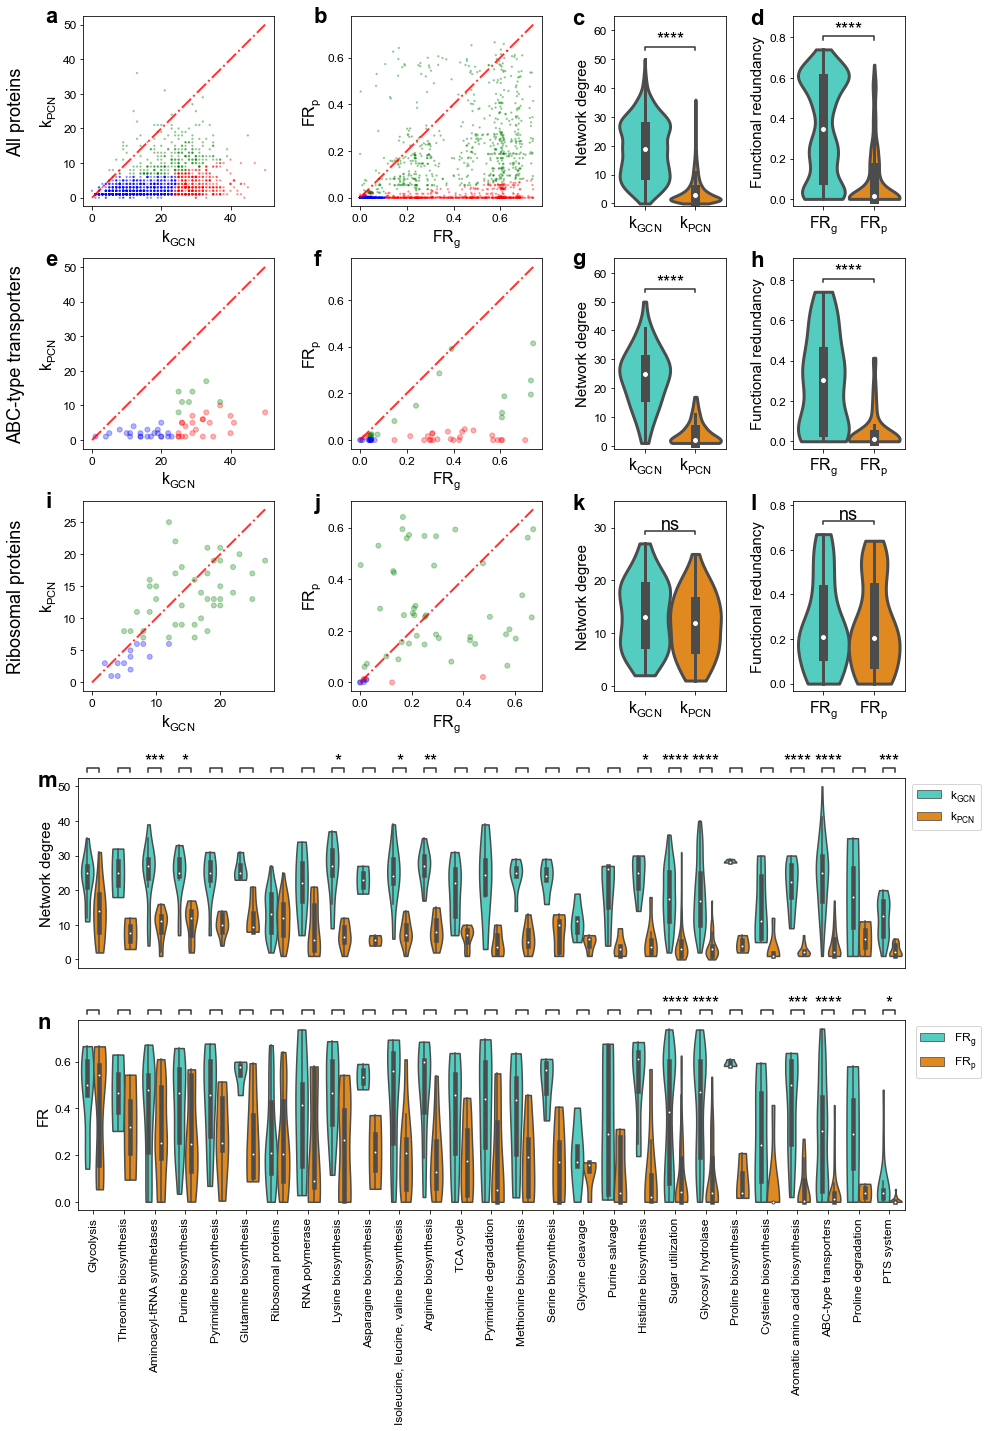

In [14]:
#### The comparison between FRg and FRp for various protein families
def plot_FR_comparison(axes, i_protein_group, one_protein_group, protein_group_name, df3_redundancy_clusters, labels_list):
    if len(one_protein_group)>200:
        s = 2
    else:
        s = 25
    
    x, y = one_protein_group['number of non-zero genomic capability'], one_protein_group['number of non-zero protein function']
    y_hc_one_protein_group = df3_redundancy_clusters.loc[one_protein_group.index]['clusters_deg']
    cmap = list(map(lambda x: color_list[x], y_hc_one_protein_group))
    ax = plt.subplot2grid((35, 19), (i_protein_group*7, 0), colspan=5, rowspan=6)
    ax.scatter(x, y, c=cmap, s=s, alpha=0.3)
    ax.plot([0, np.max(x)], [0, np.max(x)], 'r-.', alpha=0.8, lw=2)
    ax.set_aspect('equal')
    ax.set_xlabel("$k_{GCN}$", fontsize=fs2)
    ax.set_ylabel("$k_{PCN}$", fontsize=fs2)
    ax.text(-0.2, 1.05, labels_list[0], transform=ax.transAxes, fontsize=fs2+6, fontweight='bold', va='top')
    ax.text(-0.4, 0.5, protein_group_name, transform=ax.transAxes, fontsize=fs2+2, verticalalignment='center', rotation=90)

    x, y = one_protein_group['FRg'], one_protein_group['FRp']
    y_hc_one_protein_group = df3_redundancy_clusters.loc[one_protein_group.index]['clusters']
    cmap = list(map(lambda x: color_list[x], y_hc_one_protein_group))
    ax = plt.subplot2grid((35, 19), (i_protein_group*7, 6), colspan=5, rowspan=6)
    ax.scatter(x, y, c=cmap, s=s, alpha=0.3)
    ax.plot([0, np.max([np.max(x),np.max(y)])], [0, np.max([np.max(x),np.max(y)])], 'r-.', alpha=0.8, lw=2)
    ax.set_aspect('equal')
    ax.set_xlabel("$FR_g$", fontsize=fs2)
    ax.set_ylabel("$FR_p$", fontsize=fs2)
    ax.text(-0.2, 1.05, labels_list[1], transform=ax.transAxes, fontsize=fs2+6, fontweight='bold', va='top')
    
    df_boxplot = one_protein_group.reset_index()[['index', 'name']]
    df_boxplot['network degree'] = one_protein_group['number of non-zero genomic capability'].values
    df_boxplot['network type'] = 'genomic capability/GCN'
    df_boxplot['Redundancy'] = one_protein_group['FRg'].values
    df_boxplot['Redundancy type'] = 'genomic capability'
    df_boxplot['COG type'] = protein_group_name
    df_boxplot_allData = df_boxplot.copy()
    df_boxplot = one_protein_group.reset_index()[['index', 'name']]
    df_boxplot['network degree'] = one_protein_group['number of non-zero protein function'].values
    df_boxplot['network type'] = 'protein function/PCN'
    df_boxplot['Redundancy'] = one_protein_group['FRp'].values
    df_boxplot['Redundancy type'] = 'protein function'
    df_boxplot['COG type'] = protein_group_name
    df_boxplot_allData = df_boxplot_allData.merge(df_boxplot, how='outer')
    df_boxplot_allData1 = df_boxplot_allData.copy()
    df_boxplot_allData

    ax = plt.subplot2grid((35, 19), (i_protein_group*7, 12), colspan=3, rowspan=6)
    df_boxplot_allData_temp = df_boxplot_allData1[df_boxplot_allData1['COG type']==protein_group_name]
    g = sns.violinplot(x="COG type", y="network degree", hue="network type",
                data=df_boxplot_allData_temp, scale='width', linewidth=3,
                palette=["turquoise", "darkorange"], height=3, aspect=1.7, cut=0, ax=ax);
    box_pairs=[
        ((protein_group_name, "genomic capability/GCN"), (protein_group_name, "protein function/PCN")),
        ]
    test_results = add_stat_annotation(g, data=df_boxplot_allData_temp, x="COG type", y="network degree",
                                       hue="network type", box_pairs=box_pairs,
                                       test='Mann-Whitney', text_format='star',
                                       verbose=2, fontsize=fs2+2, text_offset=-2)
    g.legend([],[], frameon=False)
    ax.set_xlabel("")
    ax.set_ylabel('Network degree')
    ax.set_xticks([-0.2,0.2])
    ax.set_xticklabels(["$k_{GCN}$", "$k_{PCN}$"], fontsize=fs2)
    ax.text(-0.38, 1.04, labels_list[2], transform=ax.transAxes, fontsize=fs2+6, fontweight='bold', va='top')
    ax.set_ylim([-1, df_boxplot_allData_temp['network degree'].max()*1.3])

    ax = plt.subplot2grid((35, 19), (i_protein_group*7, 16), colspan=3, rowspan=6)
    df_boxplot_allData_temp = df_boxplot_allData1[df_boxplot_allData1['COG type']==protein_group_name]
    g = sns.violinplot(x="COG type", y="Redundancy", hue="Redundancy type",
                data=df_boxplot_allData_temp, scale='width', linewidth=3,
                palette=["turquoise", "darkorange"], height=3, aspect=1.7, cut=0, ax=ax);
    box_pairs=[
        ((protein_group_name, "genomic capability"), (protein_group_name, "protein function")),
        ]
    test_results = add_stat_annotation(g, data=df_boxplot_allData_temp, x="COG type", y="Redundancy",
                                       hue="Redundancy type", box_pairs=box_pairs,
                                       test='Mann-Whitney', text_format='star',
                                       verbose=2, fontsize=fs2+2, text_offset=-2)
    g.legend([],[], frameon=False)
    ax.set_xlabel("")
    ax.set_ylabel('Functional redundancy')
    ax.set_xticks([-0.2,0.2])
    ax.set_xticklabels(["$FR_g$", "$FR_p$"], fontsize=fs2)
    ax.text(-0.38, 1.04, labels_list[3], transform=ax.transAxes, fontsize=fs2+6, fontweight='bold', va='top')

num_protein_groups = 3
f = plt.figure(figsize=(14,7.0*num_protein_groups))

df3_redundancy_clusters = df3_redundancy.copy()
y_hc = gmm.predict(df3_redundancy_clusters.iloc[:,[4,5]].values)
clf = NearestCentroid()
clf.fit(df3_redundancy_clusters.iloc[:,[4,5]].values, y_hc)
centroids = clf.centroids_
rank = np.sum(gmm.means_ > gmm.means_.mean(0), 1) #[specialist, niche, essential]
df3_redundancy_clusters['clusters'] = rank[y_hc]
deg_normalized = df3_redundancy_clusters.iloc[:,[2,3]] / df3_redundancy_clusters.iloc[:,[2,3]].max()
y_hc_deg = gmm_deg.predict(deg_normalized.values)
clf = NearestCentroid()
clf.fit(deg_normalized.values, y_hc_deg)
centroids = clf.centroids_
rank_deg = np.sum(gmm_deg.means_ > gmm_deg.means_.mean(0), 1) #[specialist, niche, essential]
df3_redundancy_clusters['clusters_deg'] = rank_deg[y_hc_deg]

ABC_transporters = df3_redundancy[df3_redundancy['name'].str.contains('ABC-type').fillna(False)]
Ribosomal_protein = df3_redundancy[df3_redundancy['name'].str.contains('Ribosomal protein').fillna(False)]
Ribosomal_protein = Ribosomal_protein[~Ribosomal_protein['name'].str.contains('ase').fillna(False)]

i_protein_group = 0
labels_list = ["$a$", "$b$", "$c$", "$d$"]
one_protein_group = df3_redundancy.copy()
protein_group_name = "All proteins"
plot_FR_comparison(axes, i_protein_group, one_protein_group, protein_group_name, df3_redundancy_clusters, labels_list)

i_protein_group += 1
labels_list = ["$e$", "$f$", "$g$", "$h$"]
one_protein_group = ABC_transporters.copy()
protein_group_name = "ABC-type transporters"
plot_FR_comparison(axes, i_protein_group, one_protein_group, protein_group_name, df3_redundancy_clusters, labels_list)
    
i_protein_group += 1
labels_list = ["$i$", "$j$", "$k$", "$l$"]
one_protein_group = Ribosomal_protein.copy()
protein_group_name = "Ribosomal proteins"
plot_FR_comparison(axes, i_protein_group, one_protein_group, protein_group_name, df3_redundancy_clusters, labels_list)

plot_order = ['Glycolysis', 'Threonine biosynthesis',
       'Aminoacyl-tRNA synthetases', 'Purine biosynthesis',
       'Pyrimidine biosynthesis', 'Glutamine biosynthesis',
       'Ribosomal proteins', 'RNA polymerase', 'Lysine biosynthesis',
       'Asparagine biosynthesis',
       'Isoleucine, leucine, valine biosynthesis',
       'Arginine biosynthesis', 'TCA cycle', 'Pyrimidine degradation',
       'Methionine biosynthesis', 'Serine biosynthesis',
       'Glycine cleavage', 'Purine salvage', 'Histidine biosynthesis',
       'Sugar utilization', 'Glycosyl hydrolase', 'Proline biosynthesis',
       'Cysteine biosynthesis', 'Aromatic amino acid biosynthesis',
       'ABC-type transporters', 'Proline degradation', "PTS system"]
ax = plt.subplot2grid((35, 19), (22, 0), colspan=19, rowspan=6)
g = sns.violinplot(x="COG type", y="network degree", hue="Redundancy type",
                data=df_boxplot_allData, scale='width', 
                palette=["turquoise", "darkorange"], height=6, aspect=2.0, 
                cut=0, ax=ax, order=plot_order);
box_pairs = []
for protein_group_name in df_boxplot_allData['COG type'].unique():
    box_pairs += [((protein_group_name, "$FR_g$"), (protein_group_name, "$FR_p$"))]
    pvalue_thresholds = [[1e-4, "****"], [1e-3, "***"], [1e-2, "**"], [0.05, "*"], [1, ""]]
test_results = add_stat_annotation(g, data=df_boxplot_allData, x="COG type", y="network degree",
                                   hue="Redundancy type", box_pairs=box_pairs,
                                   test='Mann-Whitney', text_format='star', pvalue_thresholds=pvalue_thresholds,
                                   verbose=0, fontsize=fs2+2, text_offset=-2, loc='outside', order=plot_order)
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(handles=ax.legend_.legendHandles, labels=["$k_{GCN}$", "$k_{PCN}$"], bbox_to_anchor=(1.1, 1.0))
ax.set_xlabel("")
ax.set_ylabel("Network degree")
ax.set_xticks([])
ax.text(-0.05, 1.04, '$m$', transform=ax.transAxes, fontsize=fs2+6, fontweight='bold', va='top')

ax = plt.subplot2grid((35, 19), (29, 0), colspan=19, rowspan=6)
g = sns.violinplot(x="COG type", y="Redundancy", hue="Redundancy type",
                data=df_boxplot_allData, scale='width',
                palette=["turquoise", "darkorange"], height=6, aspect=2.0, 
                cut=0, ax=ax, order=plot_order);
box_pairs = []
for protein_group_name in df_boxplot_allData['COG type'].unique():
    box_pairs += [((protein_group_name, "$FR_g$"), (protein_group_name, "$FR_p$"))]
test_results = add_stat_annotation(g, data=df_boxplot_allData, x="COG type", y="Redundancy",
                                   hue="Redundancy type", box_pairs=box_pairs,
                                   test='Mann-Whitney', text_format='star', pvalue_thresholds=pvalue_thresholds,
                                   verbose=0, fontsize=fs2+2, text_offset=-2, loc='outside', order=plot_order)
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1.1, 1.0))
ax.set_ylabel("FR")
ax.set_xlabel('')
ax.text(-0.05, 1.04, '$n$', transform=ax.transAxes, fontsize=fs2+6, fontweight='bold', va='top')

f.subplots_adjust(hspace=1, wspace=1, left=0.09, bottom=0.19, right=0.91, top=0.98)

#f.savefig("./figures/protein_families_FR_comparison.pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

All proteins_genomic capability/GCN v.s. All proteins_protein function/PCN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=2.184e+06
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

All proteins_genomic capability v.s. All proteins_protein function: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.821e-205 U_stat=1.943e+06
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ABC-type transporters_genomic capability/GCN v.s. ABC-type transporters_protein function/PCN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.

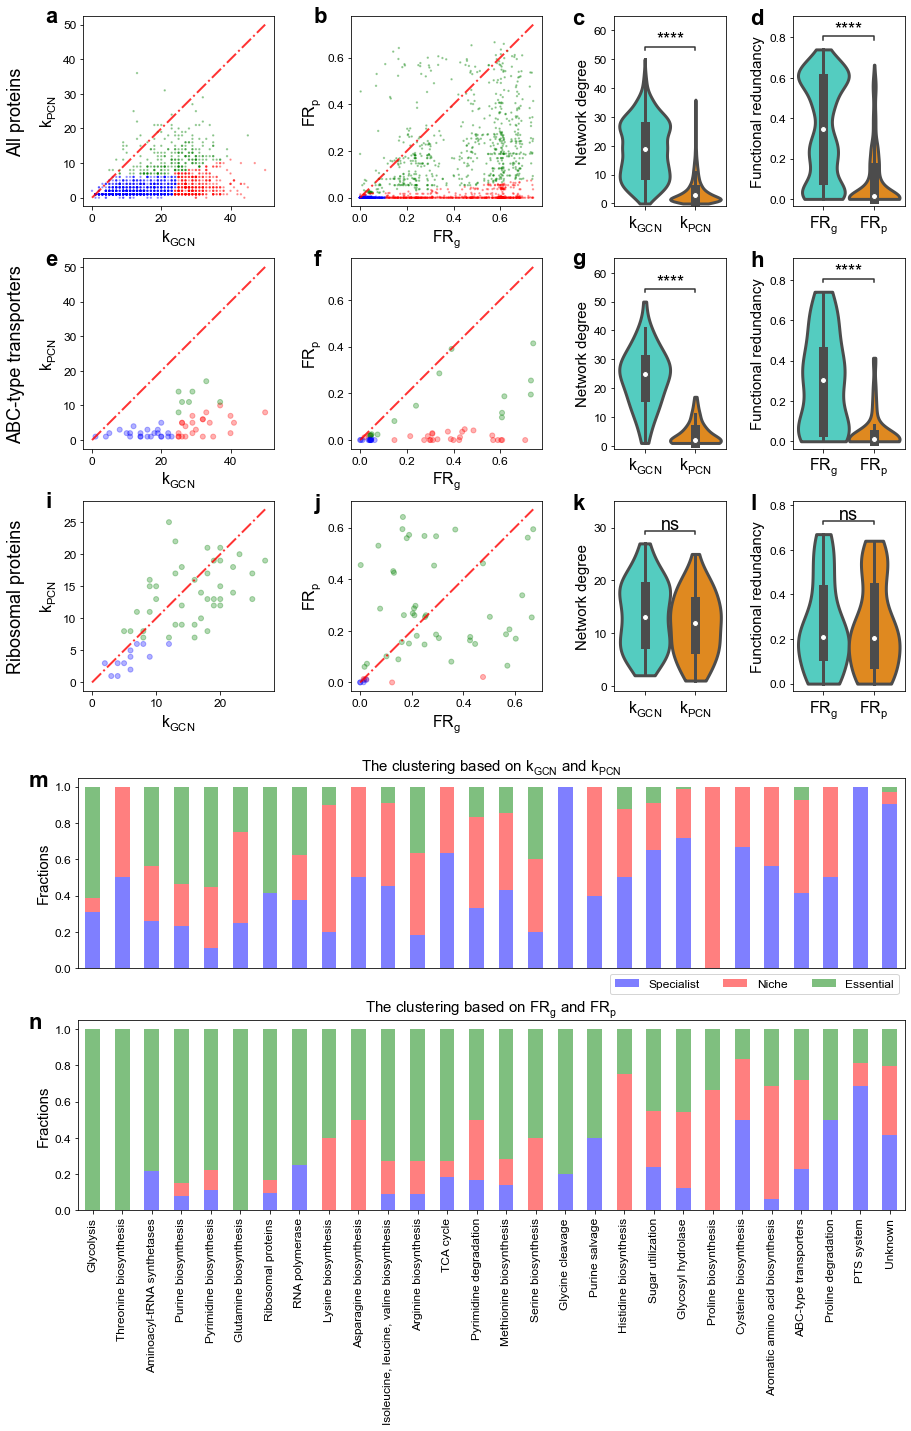

In [15]:
#### The comparison between FRg and FRp for various protein families
def plot_FR_comparison(axes, i_protein_group, one_protein_group, protein_group_name, df3_redundancy_clusters, labels_list):
    if len(one_protein_group)>200:
        s = 2
    else:
        s = 25
    
    x, y = one_protein_group['number of non-zero genomic capability'], one_protein_group['number of non-zero protein function']
    y_hc_one_protein_group = df3_redundancy_clusters.loc[one_protein_group.index]['clusters_deg']
    cmap = list(map(lambda x: color_list[x], y_hc_one_protein_group))
    ax = plt.subplot2grid((35, 19), (i_protein_group*7, 0), colspan=5, rowspan=6)
    ax.scatter(x, y, c=cmap, s=s, alpha=0.3)
    ax.plot([0, np.max(x)], [0, np.max(x)], 'r-.', alpha=0.8, lw=2)
    ax.set_aspect('equal')
    ax.set_xlabel("$k_{GCN}$", fontsize=fs2)
    ax.set_ylabel("$k_{PCN}$", fontsize=fs2)
    ax.text(-0.2, 1.05, labels_list[0], transform=ax.transAxes, fontsize=fs2+6, fontweight='bold', va='top')
    ax.text(-0.4, 0.5, protein_group_name, transform=ax.transAxes, fontsize=fs2+2, verticalalignment='center', rotation=90)

    x, y = one_protein_group['FRg'], one_protein_group['FRp']
    y_hc_one_protein_group = df3_redundancy_clusters.loc[one_protein_group.index]['clusters']
    cmap = list(map(lambda x: color_list[x], y_hc_one_protein_group))
    ax = plt.subplot2grid((35, 19), (i_protein_group*7, 6), colspan=5, rowspan=6)
    ax.scatter(x, y, c=cmap, s=s, alpha=0.3)
    ax.plot([0, np.max([np.max(x),np.max(y)])], [0, np.max([np.max(x),np.max(y)])], 'r-.', alpha=0.8, lw=2)
    ax.set_aspect('equal')
    ax.set_xlabel("$FR_g$", fontsize=fs2)
    ax.set_ylabel("$FR_p$", fontsize=fs2)
    ax.text(-0.2, 1.05, labels_list[1], transform=ax.transAxes, fontsize=fs2+6, fontweight='bold', va='top')
    
    df_boxplot = one_protein_group.reset_index()[['index', 'name']]
    df_boxplot['network degree'] = one_protein_group['number of non-zero genomic capability'].values
    df_boxplot['network type'] = 'genomic capability/GCN'
    df_boxplot['Redundancy'] = one_protein_group['FRg'].values
    df_boxplot['Redundancy type'] = 'genomic capability'
    df_boxplot['COG type'] = protein_group_name
    df_boxplot_allData = df_boxplot.copy()
    df_boxplot = one_protein_group.reset_index()[['index', 'name']]
    df_boxplot['network degree'] = one_protein_group['number of non-zero protein function'].values
    df_boxplot['network type'] = 'protein function/PCN'
    df_boxplot['Redundancy'] = one_protein_group['FRp'].values
    df_boxplot['Redundancy type'] = 'protein function'
    df_boxplot['COG type'] = protein_group_name
    df_boxplot_allData = df_boxplot_allData.merge(df_boxplot, how='outer')
    df_boxplot_allData1 = df_boxplot_allData.copy()
    df_boxplot_allData

    ax = plt.subplot2grid((35, 19), (i_protein_group*7, 12), colspan=3, rowspan=6)
    df_boxplot_allData_temp = df_boxplot_allData1[df_boxplot_allData1['COG type']==protein_group_name]
    g = sns.violinplot(x="COG type", y="network degree", hue="network type",
                data=df_boxplot_allData_temp, scale='width', linewidth=3,
                palette=["turquoise", "darkorange"], height=3, aspect=1.7, cut=0, ax=ax);
    box_pairs=[
        ((protein_group_name, "genomic capability/GCN"), (protein_group_name, "protein function/PCN")),
        ]
    test_results = add_stat_annotation(g, data=df_boxplot_allData_temp, x="COG type", y="network degree",
                                       hue="network type", box_pairs=box_pairs,
                                       test='Mann-Whitney', text_format='star',
                                       verbose=2, fontsize=fs2+2, text_offset=-2)
    g.legend([],[], frameon=False)
    ax.set_xlabel("")
    ax.set_ylabel('Network degree')
    ax.set_xticks([-0.2,0.2])
    ax.set_xticklabels(["$k_{GCN}$", "$k_{PCN}$"], fontsize=fs2)
    ax.text(-0.38, 1.04, labels_list[2], transform=ax.transAxes, fontsize=fs2+6, fontweight='bold', va='top')
    ax.set_ylim([-1, df_boxplot_allData_temp['network degree'].max()*1.3])

    ax = plt.subplot2grid((35, 19), (i_protein_group*7, 16), colspan=3, rowspan=6)
    df_boxplot_allData_temp = df_boxplot_allData1[df_boxplot_allData1['COG type']==protein_group_name]
    g = sns.violinplot(x="COG type", y="Redundancy", hue="Redundancy type",
                data=df_boxplot_allData_temp, scale='width', linewidth=3,
                palette=["turquoise", "darkorange"], height=3, aspect=1.7, cut=0, ax=ax);
    box_pairs=[
        ((protein_group_name, "genomic capability"), (protein_group_name, "protein function")),
        ]
    test_results = add_stat_annotation(g, data=df_boxplot_allData_temp, x="COG type", y="Redundancy",
                                       hue="Redundancy type", box_pairs=box_pairs,
                                       test='Mann-Whitney', text_format='star',
                                       verbose=2, fontsize=fs2+2, text_offset=-2)
    g.legend([],[], frameon=False)
    ax.set_xlabel("")
    ax.set_ylabel('Functional redundancy')
    ax.set_xticks([-0.2,0.2])
    ax.set_xticklabels(["$FR_g$", "$FR_p$"], fontsize=fs2)
    ax.text(-0.38, 1.04, labels_list[3], transform=ax.transAxes, fontsize=fs2+6, fontweight='bold', va='top')

num_protein_groups = 3
f = plt.figure(figsize=(14,7.0*num_protein_groups))

df3_redundancy_clusters = df3_redundancy.copy()
y_hc = gmm.predict(df3_redundancy_clusters.iloc[:,[4,5]].values)
clf = NearestCentroid()
clf.fit(df3_redundancy_clusters.iloc[:,[4,5]].values, y_hc)
centroids = clf.centroids_
rank = np.sum(gmm.means_ > gmm.means_.mean(0), 1) #[specialist, niche, essential]
df3_redundancy_clusters['clusters'] = rank[y_hc]
deg_normalized = df3_redundancy_clusters.iloc[:,[2,3]] / df3_redundancy_clusters.iloc[:,[2,3]].max()
y_hc_deg = gmm_deg.predict(deg_normalized.values)
clf = NearestCentroid()
clf.fit(deg_normalized.values, y_hc_deg)
centroids = clf.centroids_
rank_deg = np.sum(gmm_deg.means_ > gmm_deg.means_.mean(0), 1) #[specialist, niche, essential]
df3_redundancy_clusters['clusters_deg'] = rank_deg[y_hc_deg]

ABC_transporters = df3_redundancy[df3_redundancy['name'].str.contains('ABC-type').fillna(False)]
Ribosomal_protein = df3_redundancy[df3_redundancy['name'].str.contains('Ribosomal protein').fillna(False)]
Ribosomal_protein = Ribosomal_protein[~Ribosomal_protein['name'].str.contains('ase').fillna(False)]

i_protein_group = 0
labels_list = ["$a$", "$b$", "$c$", "$d$"]
one_protein_group = df3_redundancy.copy()
protein_group_name = "All proteins"
plot_FR_comparison(axes, i_protein_group, one_protein_group, protein_group_name, df3_redundancy_clusters, labels_list)

i_protein_group += 1
labels_list = ["$e$", "$f$", "$g$", "$h$"]
one_protein_group = ABC_transporters.copy()
protein_group_name = "ABC-type transporters"
plot_FR_comparison(axes, i_protein_group, one_protein_group, protein_group_name, df3_redundancy_clusters, labels_list)
    
i_protein_group += 1
labels_list = ["$i$", "$j$", "$k$", "$l$"]
one_protein_group = Ribosomal_protein.copy()
protein_group_name = "Ribosomal proteins"
plot_FR_comparison(axes, i_protein_group, one_protein_group, protein_group_name, df3_redundancy_clusters, labels_list)

plot_order = ['Glycolysis', 'Threonine biosynthesis',
       'Aminoacyl-tRNA synthetases', 'Purine biosynthesis',
       'Pyrimidine biosynthesis', 'Glutamine biosynthesis',
       'Ribosomal proteins', 'RNA polymerase', 'Lysine biosynthesis',
       'Asparagine biosynthesis',
       'Isoleucine, leucine, valine biosynthesis',
       'Arginine biosynthesis', 'TCA cycle', 'Pyrimidine degradation',
       'Methionine biosynthesis', 'Serine biosynthesis',
       'Glycine cleavage', 'Purine salvage', 'Histidine biosynthesis',
       'Sugar utilization', 'Glycosyl hydrolase', 'Proline biosynthesis',
       'Cysteine biosynthesis', 'Aromatic amino acid biosynthesis',
       'ABC-type transporters', 'Proline degradation', "PTS system", 'Unknown']
df_clusters_deg = pd.pivot_table(df_protein_groups_all, values='name', index="clusters_deg", 
                                columns='protein_group_name', aggfunc='count')
df_unknown = df3_redundancy_clusters[df3_redundancy_clusters['func']=="S"]
df_clusters_deg['Unknown'] = [np.sum(df_unknown['clusters_deg']==0), np.sum(df_unknown['clusters_deg']==1), np.sum(df_unknown['clusters_deg']==2)]
df_clusters_deg[df_clusters_deg!=df_clusters_deg] = 0
df_clusters_deg_normalized = df_clusters_deg / df_clusters_deg.sum(0)

df_clusters_FR = pd.pivot_table(df_protein_groups_all, values='name', index="clusters", 
                                columns='protein_group_name', aggfunc='count')
df_unknown = df3_redundancy_clusters[df3_redundancy_clusters['func']=="S"]
df_clusters_FR['Unknown'] = [np.sum(df_unknown['clusters']==0), np.sum(df_unknown['clusters']==1), np.sum(df_unknown['clusters']==2)]
df_clusters_FR[df_clusters_FR!=df_clusters_FR] = 0
df_clusters_FR_normalized = df_clusters_FR / df_clusters_FR.sum(0)
plot_order = np.array(plot_order)[list(map(lambda x: x in df_clusters_FR.columns, plot_order))]

ax = plt.subplot2grid((35, 19), (22, 0), colspan=19, rowspan=6)
df_clusters_deg_normalized[plot_order].transpose().reset_index().plot.bar(x='protein_group_name', 
    stacked=True, title="The clustering based on $k_{GCN}$ and $k_{PCN}$", color=color_list, alpha=0.5, ax=ax)
ax.legend(handles=ax.legend_.legendHandles, labels=["Specialist", "Niche", "Essential"], bbox_to_anchor=(1.0, 0.0), ncol=3)
ax.set_ylabel("Fractions")
ax.set_xlabel("")
ax.set_xticks([])
ax.text(-0.06, 1.04, '$m$', transform=ax.transAxes, fontsize=fs2+6, fontweight='bold', va='top')

ax = plt.subplot2grid((35, 19), (29, 0), colspan=19, rowspan=6)
df_clusters_FR_normalized[plot_order].transpose().reset_index().plot.bar(x='protein_group_name', 
    stacked=True, title="The clustering based on $FR_g$ and $FR_p$", color=color_list, alpha=0.5, ax=ax, legend=False)
ax.set_xticks(range(len(plot_order))); ax.set_xticklabels(plot_order)
ax.set_ylabel("Fractions")
ax.set_xlabel("")
ax.text(-0.06, 1.04, '$n$', transform=ax.transAxes, fontsize=fs2+6, fontweight='bold', va='top')

f.subplots_adjust(hspace=1, wspace=1, left=0.09, bottom=0.19, right=0.91, top=0.98)

#f.savefig("./figures/protein_families_function_type_classification.pdf")


In [16]:
df_classified_results = df3_redundancy_clusters.copy()
string_replacement_dict = {0: "specialist", 1: "niche", 2: "essential"}
df_classified_results['clusters'] = df_classified_results['clusters'].replace(string_replacement_dict)
df_classified_results['clusters_deg'] = df_classified_results['clusters_deg'].replace(string_replacement_dict)
df_classified_results = df_classified_results.rename({'number of non-zero genomic capability': 'kGCN', 
                                              'number of non-zero protein function': 'kPCN',
                                              'clusters': 'clusters_FR'}, axis='columns')
df_classified_results.to_csv(path_to_data+"./classification_results.csv")
df_classified_results


,func,name,kGCN,kPCN,FRg,FRp,clusters_FR,clusters_deg
COG0001,H,Glutamate-1-semialdehyde aminotransferase,11,1,0.011126,0.000000,specialist,specialist
COG0002,E,N-acetyl-gamma-glutamylphosphate reductase,30,8,0.684843,0.125851,essential,niche
COG0005,F,Purine nucleoside phosphorylase,27,4,0.665984,0.311458,essential,niche
COG0006,E,Xaa-Pro aminopeptidase,34,12,0.616993,0.597376,essential,essential
COG0008,J,Glutamyl- or glutaminyl-tRNA synthetase,34,14,0.661888,0.610828,essential,essential
...,...,...,...,...,...,...,...,...
COG5527,X,Protein involved in initiation of plasmid repl...,8,1,0.362914,0.000000,niche,specialist
COG5549,O,Predicted Zn-dependent protease,5,1,0.094240,0.000000,specialist,specialist
COG5564,S,Predicted TIM-barrel enzyme,3,1,0.001885,0.000000,specialist,specialist
COG5567,S,Predicted small periplasmic lipoprotein YifL (...,7,1,0.015753,0.000000,specialist,specialist
